## Setup the environment  

In [2]:
library(tidyverse)
library(lubridate)
library(ggplot2)
library(dplyr)
library(skimr)
library(janitor)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




## Import data

In [4]:
jun_2021 <- read_csv("../input/cyclistic-june-2021-to-may-2022/june_2021.csv")
jul_2021 <- read_csv("../input/cyclistic-june-2021-to-may-2022/july_2021.csv")
aug_2021 <- read_csv("../input/cyclistic-june-2021-to-may-2022/august_2021.csv")
sep_2021 <- read_csv("../input/cyclistic-june-2021-to-may-2022/september_2021.csv")
oct_2021 <- read_csv("../input/cyclistic-june-2021-to-may-2022/october_2021.csv")
nov_2021 <- read_csv("../input/cyclistic-june-2021-to-may-2022/november_2021.csv")
dec_2021 <- read_csv("../input/cyclistic-june-2021-to-may-2022/december_2021.csv")
jan_2022 <- read_csv("../input/cyclistic-june-2021-to-may-2022/january_2022.csv")
feb_2022 <- read_csv("../input/cyclistic-june-2021-to-may-2022/february_2022.csv")
mar_2022 <- read_csv("../input/cyclistic-june-2021-to-may-2022/march_2022.csv")
apr_2022 <- read_csv("../input/cyclistic-june-2021-to-may-2022/april_2022.csv")
may_2022 <- read_csv("../input/cyclistic-june-2021-to-may-2022/may_2022.csv")


Rows: 729590 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): ride_id, rideable_type, started_at, ended_at, start_station_name, ...
dbl  (4): start_lat, start_lng, end_lat, end_lng
time (1): ride_length

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 822397 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): ride_id, rideable_type, started_at, ended_at, start_station_name, ...
dbl  (4): start_lat, start_lng, end_lat, end_lng
time (1): ride_length

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 804342 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): ride_id, rideab

#### Combine the data into a single dataframe

In [5]:
all_trips <- bind_rows(jun_2021,jul_2021,aug_2021,sep_2021,oct_2021,nov_2021,dec_2021,jan_2022,feb_2022,mar_2022,apr_2022,may_2022)

## Explore data 

In [6]:
glimpse(all_trips)

Rows: 5,860,656
Columns: 14
$ ride_id            <chr> "423C46DC96C2419C", "B378BAD6FFFAB1FD", "47221913FF…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <chr> "24-06-2021 09:26", "27-06-2021 11:41", "21-06-2021…
$ ended_at           <chr> "24-06-2021 10:34", "27-06-2021 13:27", "21-06-2021…
$ start_station_name <chr> "Hegewisch Metra Station", "Avenue O & 134th St", N…
$ start_station_id   <chr> "20215", "20214", NA, NA, "20217", NA, "20104", "20…
$ end_station_name   <chr> NA, NA, NA, NA, NA, NA, NA, "Hegewisch Metra Statio…
$ end_station_id     <chr> NA, NA, NA, NA, NA, NA, NA, "20215", "20215", "2021…
$ start_lat          <dbl> 41.64862, 41.65192, 41.72000, 41.64000, 41.66628, 4…
$ start_lng          <dbl> -87.54624, -87.53962, -87.62000, -87.62000, -87.557…
$ end_lat            <dbl> 41.51000, 41.60000, 41.60000, 41.60000, 41.64000, 4…
$ end_lng            <dbl> -87.54000, -87.55000, -87.60000, -87.60000, -87.560…
$ member_cas

In [7]:
summary(all_trips)

   ride_id          rideable_type       started_at          ended_at        
 Length:5860656     Length:5860656     Length:5860656     Length:5860656    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:5860656     Length:5860656     Length:5860656     Length:5860656    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

In [8]:
head(all_trips)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>
423C46DC96C2419C,electric_bike,24-06-2021 09:26,24-06-2021 10:34,Hegewisch Metra Station,20215,NA,NA,41.64862,-87.54624,41.51,-87.54,casual,01:07:39
B378BAD6FFFAB1FD,electric_bike,27-06-2021 11:41,27-06-2021 13:27,Avenue O & 134th St,20214,NA,NA,41.65192,-87.53962,41.60,-87.55,member,01:46:51
47221913FFEDA2E3,electric_bike,21-06-2021 14:25,21-06-2021 16:12,NA,NA,NA,NA,41.72000,-87.62000,41.60,-87.60,casual,01:47:17
C2BE70113C46C345,electric_bike,18-06-2021 12:21,18-06-2021 15:09,NA,NA,NA,NA,41.64000,-87.62000,41.60,-87.60,casual,02:48:21
3147CB6FCE81DB26,electric_bike,09-06-2021 02:43,09-06-2021 02:51,Torrence Ave & 126th Pl,20217,NA,NA,41.66628,-87.55725,41.64,-87.56,member,00:08:43
4F4BDFE591CF15B3,electric_bike,18-06-2021 06:48,18-06-2021 07:21,NA,NA,NA,NA,41.69000,-87.62000,41.64,-87.62,casual,00:33:12


In [9]:
skim(all_trips)

── Data Summary ────────────────────────
                           Values   
Name                       all_trips
Number of rows             5860656  
Number of columns          14       
_______________________             
Column type frequency:              
  character                9        
  difftime                 1        
  numeric                  4        
________________________            
Group variables            None     

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate min max empty n_unique whitespace
1 ride_id                    0         1       8  16     0  5858574          0
2 rideable_type              0         1      11  13     0        3          0
3 started_at                 0         1      16  16     0   461878          0
4 ended_at                   0         1      16  16     0   462510          0
5 start_station_name    823150         0.860   3  53     0     1105        

ERROR: Error: No method asJSON S3 class: difftime


## Data cleaning and processing

### Handling NA values

In [33]:
# Data excluding rows having NA values
all_trips_withoutNA <- drop_na(all_trips)

#### Percentage of observations removed

In [34]:
print(paste("Percentage of observations removed: ", ((nrow(all_trips)-nrow(all_trips_withoutNA))/nrow(all_trips))*100))

[1] "Percentage of observations removed:  20.3635731152325"


Since a significant proportion of total observations (about 20 percent) have NA values, and since values of variables crucial to the analysis are not missing for these rows, they will be retained for the purpose of this analysis. 

###  Handling duplicates

In [12]:
all_trips_no_dups <- distinct(all_trips, ride_id, .keep_all = TRUE)
print(paste("Number of duplicate rows removed: ", nrow(all_trips) - nrow(all_trips_no_dups)))

[1] "Number of duplicate rows removed:  2082"


In [13]:
# Reassign data set without duplicate ride_id as all_trips and delete all_trips_no_dups
all_trips <- all_trips_no_dups
rm(all_trips_no_dups)
skim(all_trips)

── Data Summary ────────────────────────
                           Values   
Name                       all_trips
Number of rows             5858574  
Number of columns          14       
_______________________             
Column type frequency:              
  character                9        
  difftime                 1        
  numeric                  4        
________________________            
Group variables            None     

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate min max empty n_unique whitespace
1 ride_id                    0         1       8  16     0  5858574          0
2 rideable_type              0         1      11  13     0        3          0
3 started_at                 0         1      16  16     0   461856          0
4 ended_at                   0         1      16  16     0   462481          0
5 start_station_name    822838         0.860   3  53     0     1105        

ERROR: Error: No method asJSON S3 class: difftime


### Handling empty rows

In [15]:
all_trips <- remove_empty(all_trips, which ="rows")
print(paste("No. of rows before removing empty rows: 5858574, No. of rows after removing empty rows: ", nrow(all_trips)))

[1] "No. of rows before removing empty rows: 5858574, No. of rows after removing empty rows:  5858574"


No empty rows as there is no change in the number of rows. 

#### Add date, year, month, day, day of week, season and time variables to enable analysis at varying levels of granularity

In [16]:
all_trips$date <- as.Date(all_trips$started_at, format= "%d-%m-%Y")
all_trips$year <- format(all_trips$date, "%Y")
all_trips$month <- format(all_trips$date, "%m")
all_trips$day <- format(all_trips$date, "%d")
all_trips$weekday <-as.character(wday(all_trips$date, label = TRUE))
all_trips$season <- case_when(all_trips$month >= "06" & all_trips$month <= "08" ~ "summer",
all_trips$month >= "09" & all_trips$month <= "11" ~ "autumn",
all_trips$month >= "03" & all_trips$month <= "05" ~ "spring",
TRUE ~ "winter")
all_trips$time <- format(dmy_hm(all_trips$started_at), format = "%H:%M")


In [17]:
# Convert ride_length to numeric data type and divide the result in secs by 60 to convert to minutes.
all_trips$ride_length <- round(as.numeric(all_trips$ride_length)/60, 2)
# Rename column to ride_length_m to denote the unit is minutes(m)
all_trips <-rename(all_trips, ride_length_m = ride_length)

In [18]:
# Cross check with specific rows from spreadsheet to ensure the new fields have been correctly computed
filter(all_trips, all_trips$ride_id =='C2E047DDF019C255')
filter(all_trips, all_trips$ride_id =='B1BBF65BC2C3806E')


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,end_lng,member_casual,ride_length_m,date,year,month,day,weekday,season,time
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
C2E047DDF019C255,electric_bike,18-01-2022 19:25,18-01-2022 19:25,Green St & Madison St,TA1307000120,NA,NA,41.88178,-87.64861,⋯,-87.65,member,0,2022-01-18,2022,01,18,Tue,winter,19:25


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,end_lng,member_casual,ride_length_m,date,year,month,day,weekday,season,time
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
B1BBF65BC2C3806E,classic_bike,23-01-2022 13:21,23-01-2022 13:21,Halsted St & Archer Ave,TA1308000013,Halsted St & Archer Ave,TA1308000013,41.8472,-87.64679,⋯,-87.64679,member,0.02,2022-01-23,2022,01,23,Sun,winter,13:21


# Analyze

### Share of rides booked by User type 

In [19]:
all_trips %>%
    group_by(member_casual) %>%
    summarise(count = n(), percentage = (n()/nrow(all_trips))*100)

member_casual,count,percentage
<chr>,<int>,<dbl>
casual,2558931,43.67839
member,3299643,56.32161


### Duration of ride

The variable ride_length represents the duration of the ride and is calculated as (ended_at - started_at)

In [20]:
# Summary statistics of ride_length
all_trips %>% 
    summarize(avg_ride_length = mean(ride_length_m), median_ride_length = median(ride_length_m), min_ride_length = min(ride_length_m), max_ride_length = max(ride_length_m))

avg_ride_length,median_ride_length,min_ride_length,max_ride_length
<dbl>,<dbl>,<dbl>,<dbl>
18.49821,11.32,0,1439.95


In [21]:
# ride_length by user type
all_trips %>% 
    group_by(member_casual) %>%
    summarize(avg_ride_length = mean(ride_length_m), median_ride_length = median(ride_length_m), min_ride_length = min(ride_length_m), max_ride_length = max(ride_length_m)) 
    

member_casual,avg_ride_length,median_ride_length,min_ride_length,max_ride_length
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
casual,25.83125,15.22,0,1439.92
member,12.81130,9.05,0,1439.95


In [22]:
# Average ride_length by user type and day of week
all_trips %>%
    group_by(weekday,member_casual) %>%
    summarize(avg_ride_length = mean(ride_length_m))


`summarise()` has grouped output by 'weekday'. You can override using the
`.groups` argument.


weekday,member_casual,avg_ride_length
<chr>,<chr>,<dbl>
Fri,casual,24.21949
Fri,member,12.55962
Mon,casual,26.16238
Mon,member,12.41643
Sat,casual,28.25782
Sat,member,14.34930
Sun,casual,29.59580
Sun,member,14.45907
Thu,casual,22.95261


In [23]:
# The days are seen to be out of order, this is fixed using the ordered function
all_trips$weekday <- ordered(all_trips$weekday, levels = c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"))

In [24]:
# Repeat the previous step to calculate the Average ride_length by user type and day of week 
all_trips %>%
    group_by(weekday,member_casual) %>%
    summarize(avg_ride_length = mean(ride_length_m))

`summarise()` has grouped output by 'weekday'. You can override using the
`.groups` argument.


weekday,member_casual,avg_ride_length
<ord>,<chr>,<dbl>
Sun,casual,29.59580
Sun,member,14.45907
Mon,casual,26.16238
Mon,member,12.41643
Tue,casual,23.04208
Tue,member,12.06538
Wed,casual,22.59036
Wed,member,12.15812
Thu,casual,22.95261


`summarise()` has grouped output by 'weekday'. You can override using the
`.groups` argument.


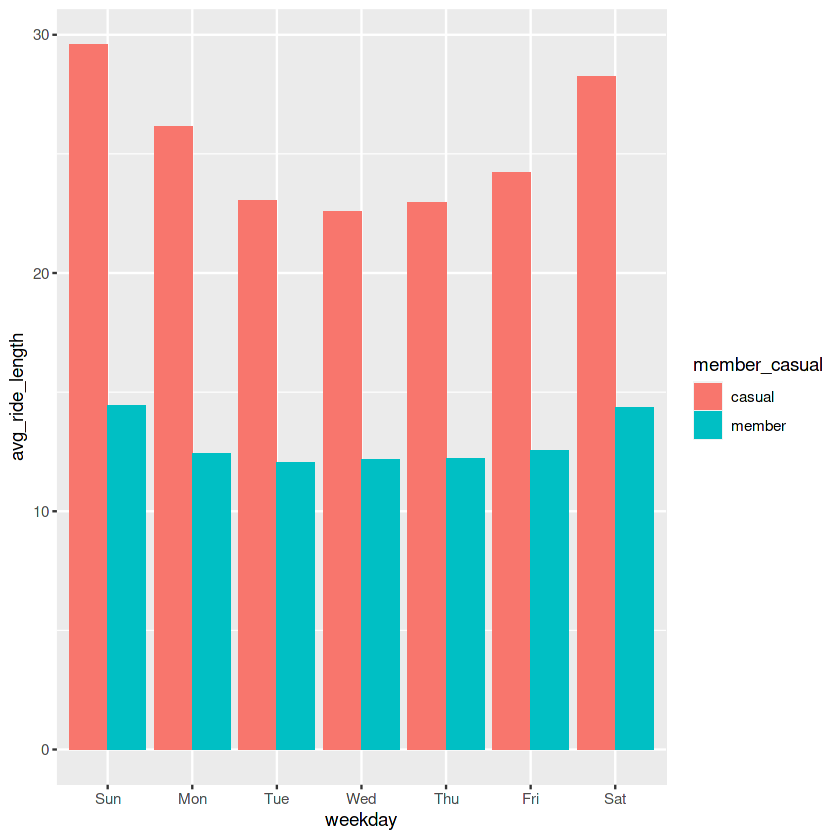

In [25]:
all_trips %>%
    group_by(weekday,member_casual) %>%
    summarize(avg_ride_length = mean(ride_length_m)) %>%
    ggplot(aes(x = weekday, y = avg_ride_length, fill = member_casual)) +
    geom_col(position = "dodge")


## Number of rides booked 

In [26]:
# Compare number of rides booked by members vs casual riders by day of the week
all_trips %>%
  group_by(weekday, member_casual) %>%
  summarize(no_of_rides = n()) %>%
  arrange(weekday, member_casual)

`summarise()` has grouped output by 'weekday'. You can override using the
`.groups` argument.


weekday,member_casual,no_of_rides
<ord>,<chr>,<int>
Sun,casual,469987
Sun,member,394559
Mon,casual,301973
Mon,member,465939
Tue,casual,286913
Tue,member,524610
Wed,casual,285672
Wed,member,512407
Thu,casual,308497


`summarise()` has grouped output by 'weekday'. You can override using the
`.groups` argument.


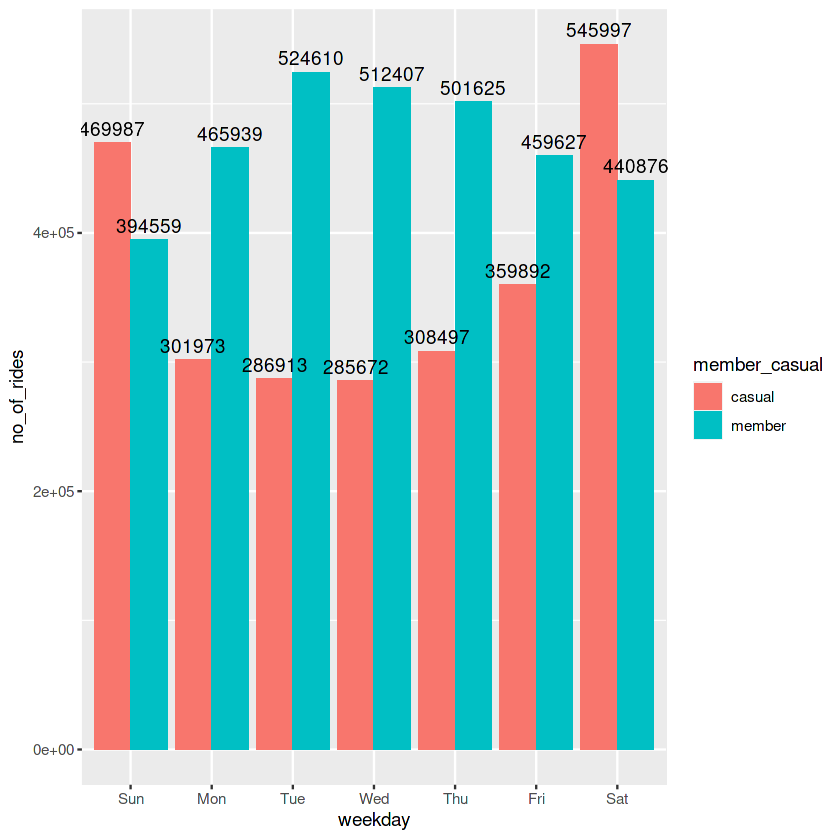

In [27]:
all_trips %>%
  group_by(weekday, member_casual) %>%
  summarize(no_of_rides = n()) %>%
  arrange(weekday, member_casual) %>%
  ggplot(aes(x = weekday, y = no_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")+
  geom_text(aes(label = no_of_rides), position = position_dodge(width = 0.9), vjust = -0.5)

## Top Location and routes

In [28]:
# Top 10 stations from where maximum number of rides originated
all_trips %>%
  filter(!is.na(start_station_name)) %>%
  group_by(start_station_name) %>%
  summarise(rides_booked = n()) %>%
  slice_max(rides_booked, n = 10)

start_station_name,rides_booked
<chr>,<int>
Streeter Dr & Grand Ave,84246
Wells St & Concord Ln,44062
Michigan Ave & Oak St,43994
Millennium Park,41265
Clark St & Elm St,40882
Wells St & Elm St,37543
Kingsbury St & Kinzie St,36097
Theater on the Lake,35933
Clark St & Armitage Ave,33035


### Top 10 routes with highest ride demand

In [29]:
all_trips %>%
  filter(!is.na(start_station_name), !is.na(end_station_name)) %>%
  group_by(start_station_name, end_station_name) %>%
  summarise(rides_booked = n()) %>%
  arrange(desc(rides_booked))  %>%
  head(n=10)

`summarise()` has grouped output by 'start_station_name'. You can override
using the `.groups` argument.


start_station_name,end_station_name,rides_booked
<chr>,<chr>,<int>
Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,12970
Ellis Ave & 60th St,University Ave & 57th St,6282
Ellis Ave & 60th St,Ellis Ave & 55th St,6263
Michigan Ave & Oak St,Michigan Ave & Oak St,6186
University Ave & 57th St,Ellis Ave & 60th St,5884
Ellis Ave & 55th St,Ellis Ave & 60th St,5543
DuSable Lake Shore Dr & Monroe St,DuSable Lake Shore Dr & Monroe St,5463
Millennium Park,Millennium Park,5451
DuSable Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,4336


It is noted that of the top 10 busiest routes, 4 have the same start and end stations. These stations are namely- 
* Streeter Dr & Grand Ave 
* Michigan Ave & Oak St 
* DuSable Lake Shore Dr & Monroe St 
* Millennium Park 

### Top 10 routes with distinct start and end stations

In [35]:
all_trips %>%
  filter(!is.na(start_station_name), !is.na(end_station_name)) %>%
  filter(start_station_name != end_station_name) %>%  
  group_by(start_station_name, end_station_name) %>%
  summarise(rides_booked = n()) %>%
  arrange(desc(rides_booked))  %>%
  head(n=10)

`summarise()` has grouped output by 'start_station_name'. You can override
using the `.groups` argument.


start_station_name,end_station_name,rides_booked
<chr>,<chr>,<int>
Ellis Ave & 60th St,University Ave & 57th St,6282
Ellis Ave & 60th St,Ellis Ave & 55th St,6263
University Ave & 57th St,Ellis Ave & 60th St,5884
Ellis Ave & 55th St,Ellis Ave & 60th St,5543
DuSable Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,4336
Streeter Dr & Grand Ave,Millennium Park,3754
Millennium Park,Streeter Dr & Grand Ave,3272
Shedd Aquarium,Streeter Dr & Grand Ave,3097
Streeter Dr & Grand Ave,Michigan Ave & Oak St,3034


# Seasonal trends

### Number of rides booked by members vs casual riders in different seasons

`summarise()` has grouped output by 'season'. You can override using the
`.groups` argument.


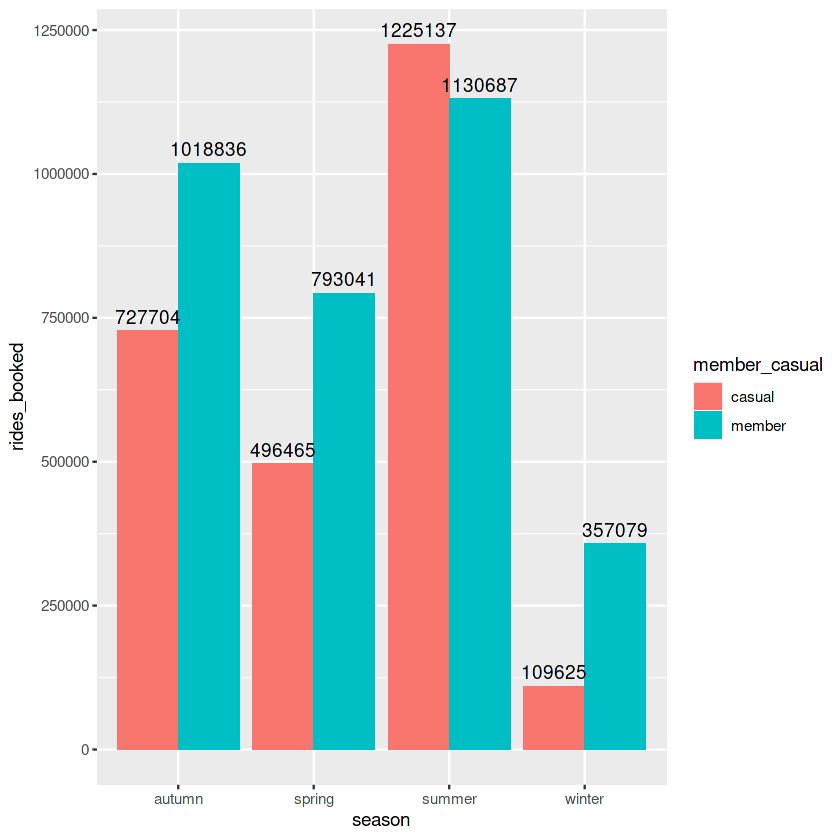

In [30]:
all_trips %>%
  group_by(season, member_casual) %>%
  summarize(rides_booked = n()) %>%
  arrange(season, member_casual) %>%
  ggplot(aes(x = season, y = rides_booked, fill = member_casual))+
  geom_col(position = "dodge")+
  geom_text(aes(label = rides_booked), position = position_dodge(width = 0.9), vjust = -0.5)

### Average ride duration of members vs casual riders in different seasons

`summarise()` has grouped output by 'season'. You can override using the
`.groups` argument.


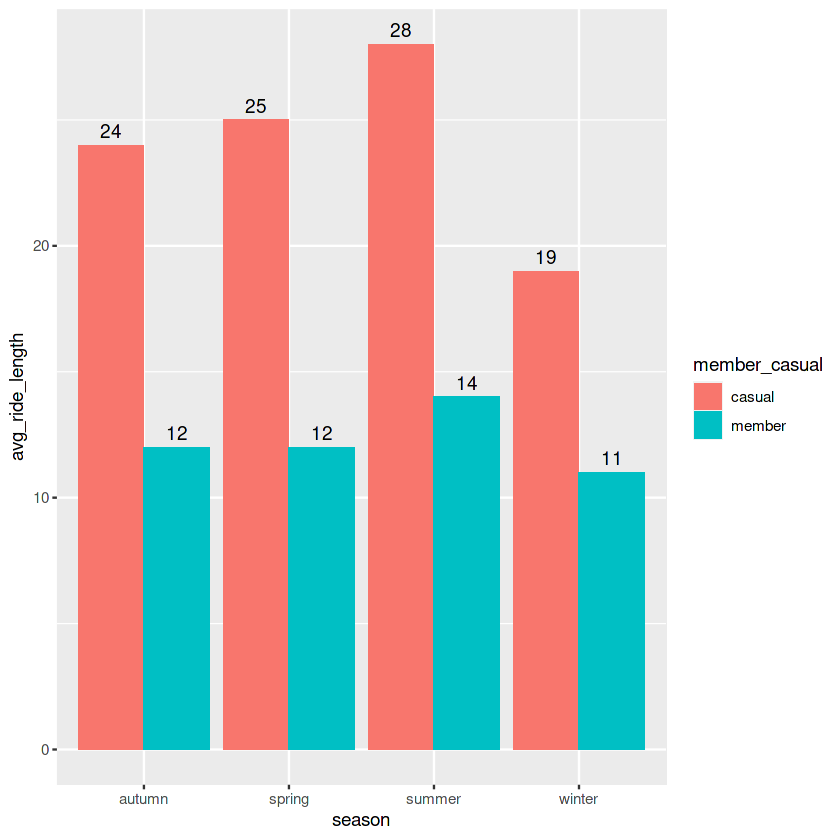

In [31]:
all_trips %>%
  group_by(season, member_casual) %>%
  summarize(avg_ride_length = round(mean(ride_length_m))) %>%
  arrange(season, member_casual) %>%
  ggplot(aes(x = season, y = avg_ride_length, fill = member_casual))+
  geom_col(position = "dodge")+
  geom_text(aes(label = avg_ride_length), position = position_dodge(width = 0.9), vjust = -0.5)

The average ride length for members remain more over less the same across all seasons, whereas a greater degree of variance is observed in average ride length of casual riders based on the season. It is in the order: summer > spring > autumn > winter.

## Distribution of rides booked by the hour of the day 

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


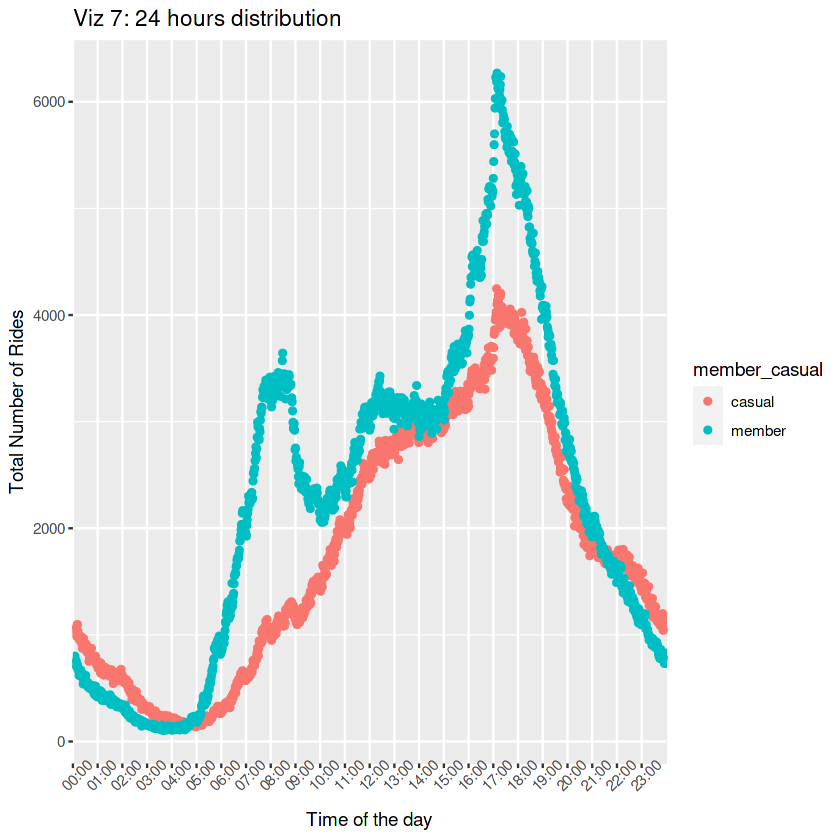

In [32]:
all_trips %>%
    group_by(member_casual,time) %>%
    summarise(total_trips= n())%>%
 ggplot(aes(x = as.POSIXct(time,format="%H:%M"), y = total_trips, color = member_casual) )+
  geom_point() +
  scale_x_datetime(date_breaks = "1 hour", minor_breaks = NULL,
                   date_labels = "%H:%M", expand = c(0,0)) +
  theme(axis.text.x = element_text(angle = 45)) +
  labs(title ="Viz 7: 24 hours distribution ", x = "Time of the day", y= "Total Number of Rides")

Ride demand is seen to be the highest between 3.00 pm and 8.00 pm.